## Time Series forcasting ( Bitcoin predict)

### Imports

In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Get Data

In [2]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.__len__()

2787

In [5]:
bitcoin_prices= pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


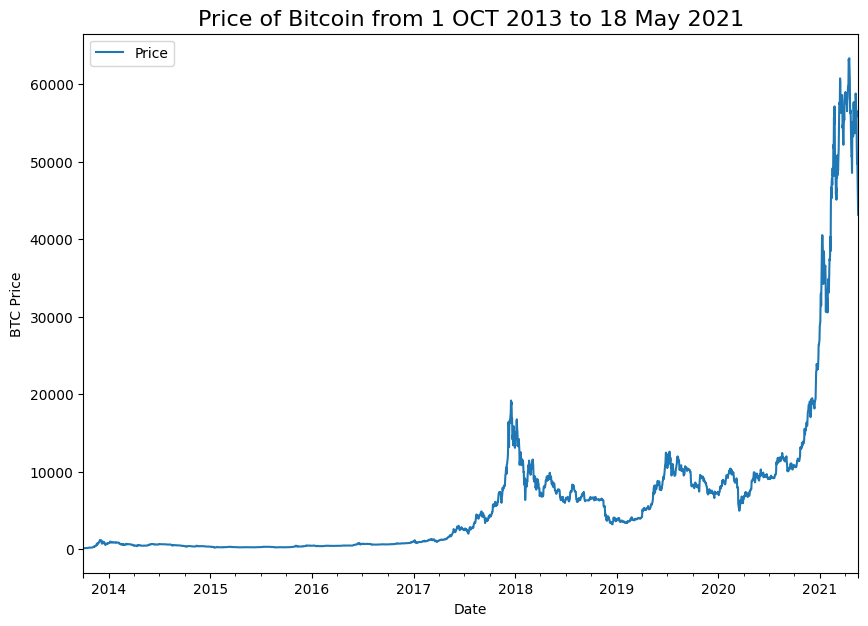

In [6]:
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 OCT 2013 to 18 May 2021",fontsize=16)
plt.legend()

### Split training and testing sets ( Wrong way )

In [7]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices= bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(timesteps,
                                                   prices,
                                                   test_size=0.2,
                                                   random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

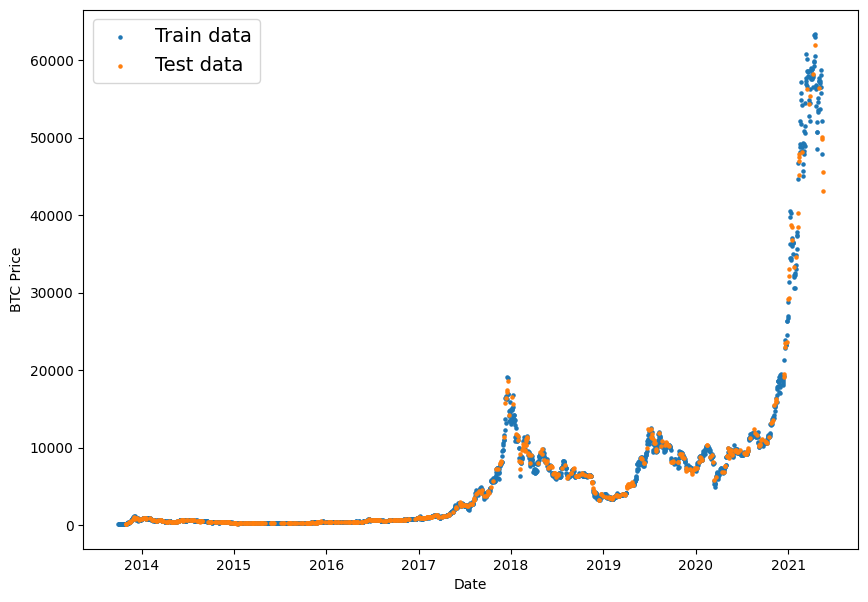

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Split training and testing sets ( Right way )

In [10]:
split_size=int(0.8 * len(prices))

X_train,y_train=timesteps[:split_size],prices[:split_size]

X_test,y_test= timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

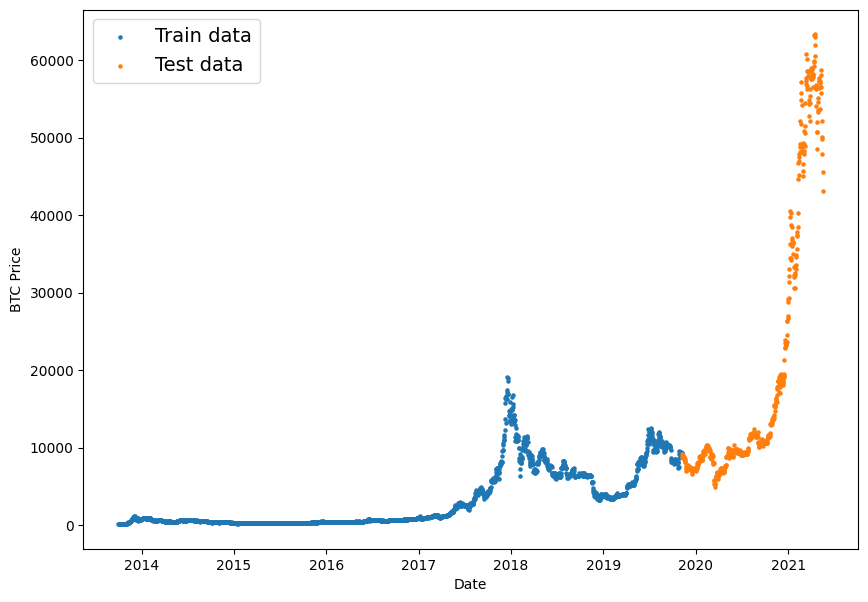

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Create Plottting function

In [12]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

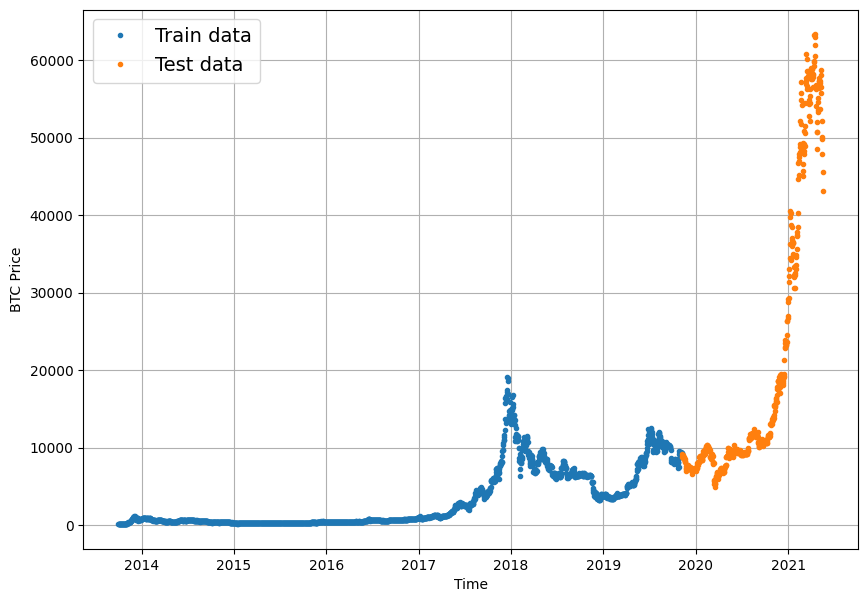

In [13]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Model 0 : Naive Forecasting 

In [14]:
naive_forecast=y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

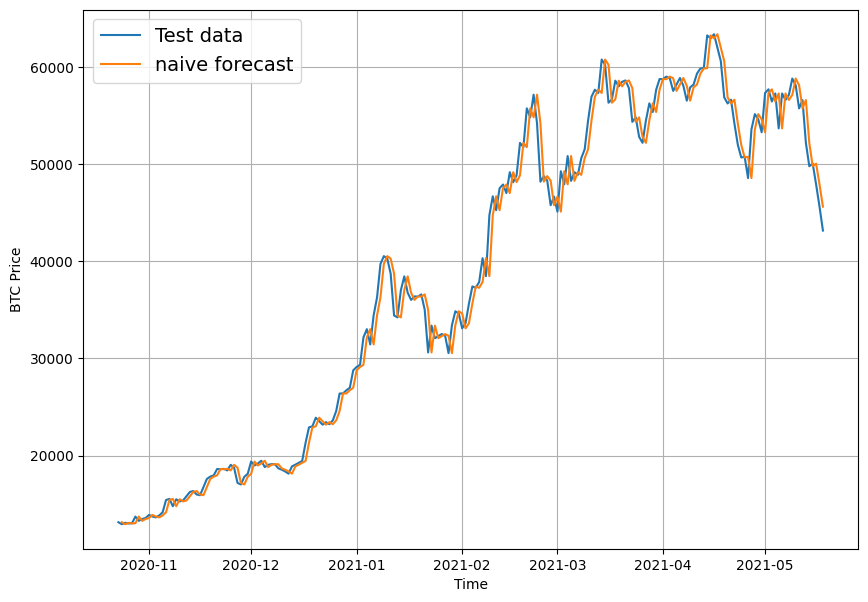

In [15]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=350,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=350,format="-",label="naive forecast")

In [16]:
import tensorflow as tf

In [17]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season= tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae/mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [19]:
# Create function to take model preds and truth values 

def evaluate_preds(y_true,y_pred):
    # Make sure float32 dtype 
    y_true= tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    
    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse= tf.sqrt(mse)
    mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase = mean_absolute_scaled_error(y_true,y_pred)
    
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse":rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy(),
            }

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data Part 2: Windowing dataset

why windowing ? 

Windowing time series dataset turns the data to a supervised learning problem

In [21]:
print(f"We want to use:{prices[:7]} to predict this: {prices[7]}")

We want to use:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] to predict this: 123.033


In [22]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data to predict

In [23]:
# function to label windowed data 
def get_labelled_window(x, horizon=HORIZON):
    return x[:,:-horizon],x[:,-horizon:]

In [24]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


### Preprocessing data to windows formatted 

In [33]:
# Create function to view Numpy arrays as windows

def make_windows(x,window_size=WINDOW_SIZE, horizon=HORIZON):
    # 1. turns 1D to 2D array of sequential labelled windows of window_size
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes= window_step +np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of windows of size window_size
    
    print(f"Window indexes:\n {window_indexes,window_indexes.shape}")
    
    # 3. Index on the target array (a time series) with 2D arra of multiple window steps
    windowed_array = x[window_indexes]
    # print(windowed_array)
    
    # 4. Get labelled windows
    windows,labels = get_labelled_window(windowed_array,horizon=horizon)
    
    return windows,labels

In [34]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [35]:
# view the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [36]:
# view the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


### HOWEVER 💡
 there is a already built in tensorflow function for preprocessing timeseries forecasting data: 
 - tf.keras.preprocessing.timeseries_dataset_from_array()

## Turning windows into training and test sets

In [37]:
# Make the train/test splits
def make_train_test_splits(windows, labels,test_split=0.2):
    
    splits_size=int(len(windows)*(1-test_split)) # this will deafult to 80% train / 20% test
    
    train_windows=windows[:split_size]
    train_labels=labels[:split_size]
    test_windows=windows[split_size:]
    test_labels=labels[split_size:]
    
    return train_windows, test_windows, train_labels , test_labels

In [38]:
# Create train and test windows 
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [39]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a modelling checkpoint 

Because our model's performance will fluctuate from experiment


In [41]:
import os
 # Create a function to implement a ModelCheckpoint callback with a specific filename
 
def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
    verbose=0,
    save_best_only=True)

#### Model 1: Dense model (window = 7, horizon = 1)

In [43]:
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")# linear activation is = No activation
    
],name="model_1_dense")

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 5s 107ms/step - loss: 770.8699 - mae: 770.8699 - mse: 2322506.0000 - val_loss: 2211.9968 - val_mae: 2211.9968 - val_mse: 12191257.0000
Epoch 2/100
18/18 [==============================] - 1s 75ms/step - loss: 231.9996 - mae: 231.9996 - mse: 235887.3438 - val_loss: 1010.5923 - val_mae: 1010.5923 - val_mse: 3439082.0000
Epoch 3/100
18/18 [==============================] - 1s 68ms/step - loss: 176.6514 - mae: 176.6514 - mse: 158764.5000 - val_loss: 936.3781 - val_mae: 936.3781 - val_mse: 2858712.0000
Epoch 4/100
18/18 [==============================] - 1s 74ms/step - loss: 163.9299 - mae: 163.9299 - mse: 144408.6562 - val_loss: 914.9297 - val_mae: 914.9297 - val_mse: 2706202.0000
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 158.4962 - mae: 158.4962 - mse: 135340.5000 - val_loss: 916.9713 - val_mae: 916.9713 - val_mse: 2605687.7500
Epoch 6/100
18/18 [==============================] - 1s 67ms/step - loss: 152.

In [44]:
# Evaluate model on test data 
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 14ms/step - loss: 602.2147 - mae: 602.2147 - mse: 1249616.8750


[602.2147216796875, 602.2147216796875, 1249616.875]

In [46]:
# Load in saved best performing model_1 and evalutate it on test data
model_1= tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 570.3397 - mae: 570.3397 - mse: 1180294.8750


[570.3397216796875, 570.3397216796875, 1180294.875]

### Making forecast with a model (on the test dataset)


In [48]:
def make_preds(model,input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [49]:
# Mkae predictions 

model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8753.916 , 8694.882 , 8529.392 , 8478.009 , 8532.248 , 8275.483 ,
        8132.823 , 8078.0557, 7702.9907, 7311.7354], dtype=float32)>)

In [52]:
model_1_results= evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': 570.3397,
 'mse': 1180294.9,
 'rmse': 1086.4137,
 'mape': 2.5392227,
 'mase': 0.99544233}

In [53]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [54]:
test_labels.shape

(551, 1)

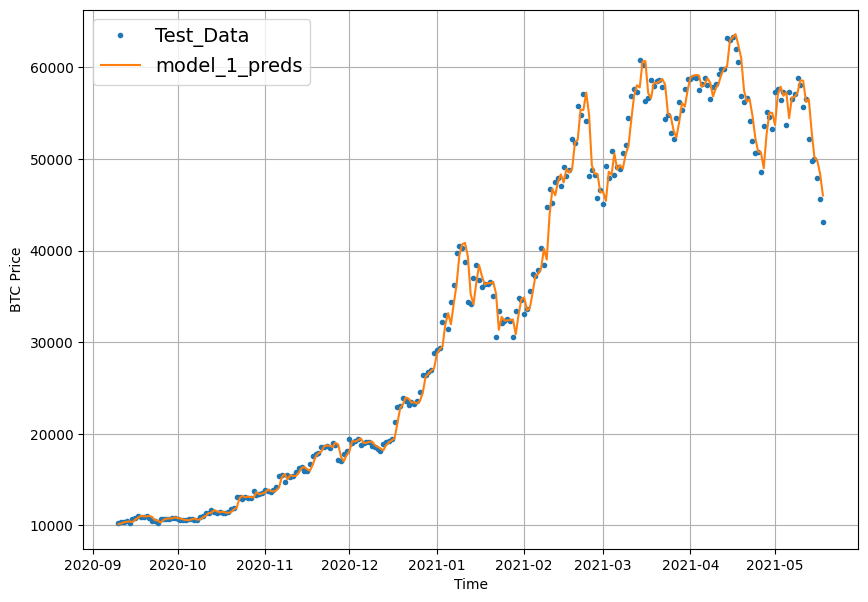

In [56]:
# Plot model 1 preds
offset= 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_Data")


plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")